In [1]:
import numpy as np
import tensorflow as tf

In [2]:
train_dir = 'data/train'
test_dir = 'data/test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='binary',seed=42)
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='binary',seed=42)

Found 834 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [8]:
import pathlib
data_dir = pathlib.Path(train_dir)
data_dir

WindowsPath('data/train')

In [9]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['photo', 'signature'], dtype='<U9')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def show_random_image(directory,class_name):
    direc = directory+class_name
    random_image = random.sample(os.listdir(direc) ,1)
    image = mpimg.imread(direc + "/" + random_image[0])
    plt.imshow(image)
    plt.title(class_name)

Enter photo(0) or signature(1) for generating random image:-1


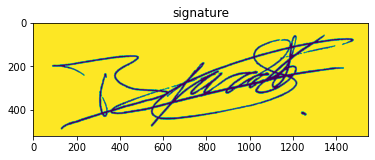

In [11]:
n=int(input("Enter photo(0) or signature(1) for generating random image:-"))
show_random_image(train_dir+"/",class_names[n])

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
     tf.keras.layers.Conv2D(filters=64,
                          kernel_size=3,
                          activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,
                          kernel_size=3,
                          activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=128,
                          kernel_size=3,
                          activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model_1=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
27/27 [==============================] - 31s 1s/step - loss: 0.3317 - accuracy: 0.8405 - val_loss: 0.0122 - val_accuracy: 0.9935
Epoch 2/5
27/27 [==============================] - 23s 855ms/step - loss: 0.0029 - accuracy: 0.9988 - val_loss: 7.6192e-04 - val_accuracy: 1.0000
Epoch 3/5
27/27 [==============================] - 23s 865ms/step - loss: 4.0616e-04 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9837
Epoch 4/5
27/27 [==============================] - 24s 880ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0323 - val_accuracy: 0.9902
Epoch 5/5
27/27 [==============================] - 24s 889ms/step - loss: 0.2449 - accuracy: 0.9365 - val_loss: 0.0147 - val_accuracy: 0.9935


In [9]:
def prep_and_predict(model,filename,class_names,image_size=224):
    image = tf.io.read_file(filename) # Reading the file
    image = tf.image.decode_image(image,channels=3) # Decode the read image to tensor and making sure to have 3 channels due to rgb
    image = tf.image.resize(image,size=(image_size,image_size))

    image = image/255. # Rescaling the data

    prediction = model.predict(tf.expand_dims(image,axis=0)) # Expanding the dimensions to make sure it matches with the dimensions of the input data

    # Ploting the prediction 
    plt.imshow(image)
    pred_class = class_names[int(tf.round(prediction)[0][0])]
    print(pred_class)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

signature


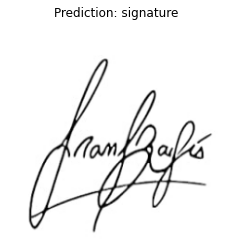

In [17]:
prep_and_predict(model,"download.jpg",class_names)

photo


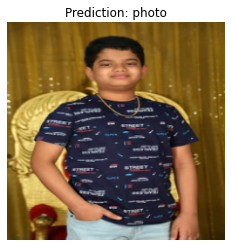

In [19]:
prep_and_predict(model,"littu.jpg",class_names)

In [16]:
def predict_and_place(model,photo,signature,class_names,image_size=224):
    im_1 = tf.io.read_file(photo)
    im_1 = tf.image.decode_image(im_1,channels=3)
    im_1 = tf.image.resize(im_1,size=(image_size,image_size))
    im_1 = im_1/255.
    prediction_1 = model.predict(tf.expand_dims(im_1,axis=0))
    pred_class_1 = class_names[int(tf.round(prediction_1)[0][0])]
    
    im_2 = tf.io.read_file(signature)
    im_2 = tf.image.decode_image(im_2,channels=3)
    im_2 = tf.image.resize(im_2,size=(image_size,image_size))
    im_2 = im_2/255.
    prediction_2 = model.predict(tf.expand_dims(im_2,axis=0))
    pred_class_2 = class_names[int(tf.round(prediction_2)[0][0])]
    
    if pred_class_1 == 'photo' and pred_class_2 == 'signature':
        return 'Placed Correctly',im_1,im_2
    elif (pred_class_1 == 'photo' and pred_class_2 == 'photo'):
        return ("ERROR : Uploaded files were both photos, please upload your signature"),im_1,im_2
    elif (pred_class_1 == 'signature' and pred_class_2 == 'signature'):
        return ("ERROR : Uploaded files were both signatures, please upload your photo")
    else:
        temp = im_2
        im_2= im_1
        im_1 = temp
        return "You uploaded photo and signature in wrong fields they were placed correctly.",im_1,im_2
        

In [10]:
a,b,c = predict_and_place(model,'littu.jpg','sign1.jpg',class_names)
a

'Placed Correctly'

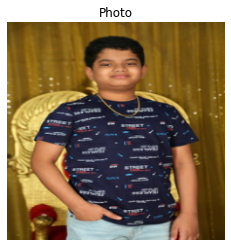

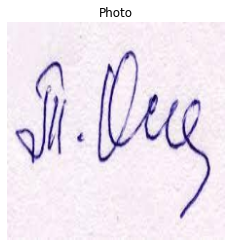

(None, None)

In [15]:
display_image(b),display_image(c)

In [29]:
a = predict_and_place(model,'sign1.jpg','littu.jpg',class_names)
a

'You uploaded photo and signature in wrong fields they were placed correctly.'

In [32]:
a = predict_and_place(model,'littu2.jpg','sign1.jpg',class_names)
a

'Placed Correctly'

In [30]:
a = predict_and_place(model,'sign1.jpg','littu2.jpg',class_names)
a

'You uploaded photo and signature in wrong fields they were placed correctly.'

In [35]:
a = predict_and_place(model,'littu2.jpg','sign1.jpg',class_names)
a

'Placed Correctly'

In [43]:
a = predict_and_place(model,'sign1.jpg','sign1.jpg',class_names)
a

'ERROR : Uploaded files were both signatures, please upload your photo'

In [42]:
a = predict_and_place(model,'littu.jpg','littu.jpg',class_names)
a

'ERROR : Uploaded files were both photos, please upload your signature'

In [53]:
def place(model,photo,signature,class_names,image_size=224):
    im_1 = tf.io.read_file(photo)
    im_1 = tf.image.decode_image(im_1,channels=3)
    im_1 = tf.image.resize(im_1,size=(image_size,image_size))
    im_1 = im_1/255.
    
    im_2 = tf.io.read_file(signature)
    im_2 = tf.image.decode_image(im_2,channels=3)
    im_2 = tf.image.resize(im_2,size=(image_size,image_size))
    im_2 = im_2/255.
    
    print("Uploaded:")
    #print("Photo & Signature as:")
    f,a = plt.subplots(1,2)
    a[0].imshow(im_2)
    a[0].axis('off')
    a[0].set_title('Photo')
    a[1].imshow(im_1)
    a[1].axis('off')
    a[1].set_title('Signature')
    
    

Uploaded:


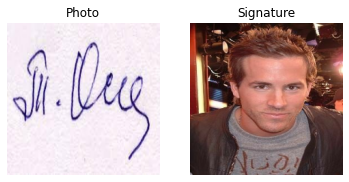

In [54]:
place(model,"Ryan_reynolds.jpg","sign1.jpg",class_names)

After checking:


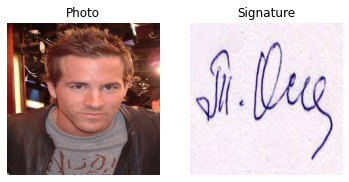

In [57]:
im1,im2 = predict_and_place(model,"sign1.jpg","Ryan_reynolds.jpg",class_names)
print("After checking:")
#print("Photo & Signature as:")
f,a = plt.subplots(1,2)
a[0].imshow(im1)
a[0].axis('off')
a[0].set_title('Photo')
a[1].imshow(im2)
a[1].axis('off')
a[1].set_title('Signature')
plt.show()

In [58]:
model.save("Photo-Signature Recognition.h5")

In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import load_model

In [4]:
model = load_model("Photo-Signature Recognition.h5")

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [13]:
import matplotlib.pyplot as plt

In [11]:
def display_image(im_1,image_size=224):
    im_1 = tf.io.read_file(im_1)
    im_1 = tf.image.decode_image(im_1,channels=3)
    im_1 = tf.image.resize(im_1,size=(image_size,image_size))
    im_1 = im_1/255.
    plt.imshow(im_1)
    plt.axis('off')
    plt.title("Photo")
    plt.show()

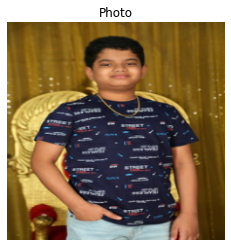

In [54]:
display_image("littu.jpg")

In [1]:
pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL
ERROR: No matching distribution found for PIL


In [2]:
import PIL

In [4]:
from PIL import Image

In [5]:
def return_image(image):
    img = Image.open(image)
    return img

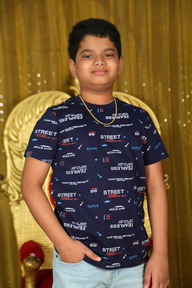

In [6]:
return_image('littu.jpg')